In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [69]:
volts = np.arange(20,0,-1)
dados = pd.DataFrame({ # é os tempos
    "primeira gravação": np.array([0,.49,.99,1.87,2.24,2.43,2.93,3.71,4.48,5.27,6,6.32,7.89,8.74,9.92,12.10,15.4,16.4,17.76,25.88]),
    "segunda gravação": np.array([0,0.72,1.38,1.38,1.92,2.55,3.19,3.98,4.74,5.30,6.87,7.49,8.70,9.40,10.37,12.50,14.33,16.55,19.93,27.32]),
    "terceira gravação": np.array([0,.48,.88,1.52,2.23,2.90,3.26,3.86,4.74,5.28,6.06,6.80,8.05,9.14,10.39,11.33,13.99,16.76,20.03,26.65]),
    "quarta gravação": np.array([0,0.73,1.05,1.35,2.06,2.49,3.28,3.91,4.64,5.44,6.28,7.04,7.68,8.94,10.32,11,13.71,16.62,20.14,26.94]),
    "quinta gravação:": np.array([0,0.72,1.20,1.74,2.27,2.78,3.46,3.94,4.84,5.50,6.38,7.12,8,9.58,10.73,12.25,14.40,16.73,20.20,26.58])
},index = volts)

In [70]:
volts

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1])

In [71]:
media = dados.mean(axis=1) # faz a operação para cada linhas

In [72]:
media

20     0.000
19     0.628
18     1.100
17     1.572
16     2.144
15     2.630
14     3.224
13     3.880
12     4.688
11     5.358
10     6.318
9      6.954
8      8.064
7      9.160
6     10.346
5     11.836
4     14.366
3     16.612
2     19.612
1     26.674
dtype: float64

In [73]:
tempo = np.array([media]).T

In [74]:
mediaerr = dados.std(axis=1)

In [75]:
mediaerr.values

array([0.        , 0.13065221, 0.19455076, 0.22687001, 0.14976648,
       0.20087309, 0.1921718 , 0.10464225, 0.13608821, 0.10497619,
       0.34557199, 0.43241184, 0.38292297, 0.33882149, 0.28814927,
       0.63971087, 0.64096022, 0.14549914, 1.04046624, 0.53101789])

Primeira gravação

In [76]:
model1 = LinearRegression()

model1.fit(tempo,np.log(volts))

LinearRegression()

In [77]:
np.log(volts)

array([2.99573227, 2.94443898, 2.89037176, 2.83321334, 2.77258872,
       2.7080502 , 2.63905733, 2.56494936, 2.48490665, 2.39789527,
       2.30258509, 2.19722458, 2.07944154, 1.94591015, 1.79175947,
       1.60943791, 1.38629436, 1.09861229, 0.69314718, 0.        ])

ValueError: operands could not be broadcast together with shapes (20,1) (2,20) 

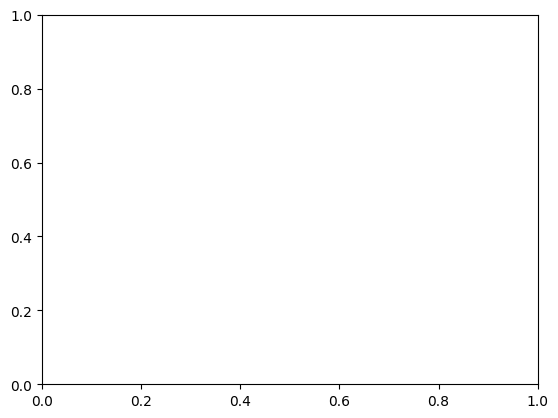

In [80]:
plt.errorbar(tempo,np.log(volts),xerr=mediaerr.values,fmt='o',markersize=5,ecolor='red',label="média dos dados")
plt.plot(tempo,model1.predict(tempo))
plt.title("ln(v) vs tempo (s)")
plt.ylabel("ln(v)")
plt.xlabel("tempo (s)")

In [ ]:
print(f'coeficiente angular: {model1.coef_}')
print(f'coeficiente linear: {model1.intercept_}')
print(f'coeficiente de determinação (R²): {r2_score(np.log(volts),model1.predict(tempo))}')

coeficiente angular: [-0.11483933]
coeficiente linear: 3.0077387856433795
coeficiente de determinação (R²): 0.9990849722665431


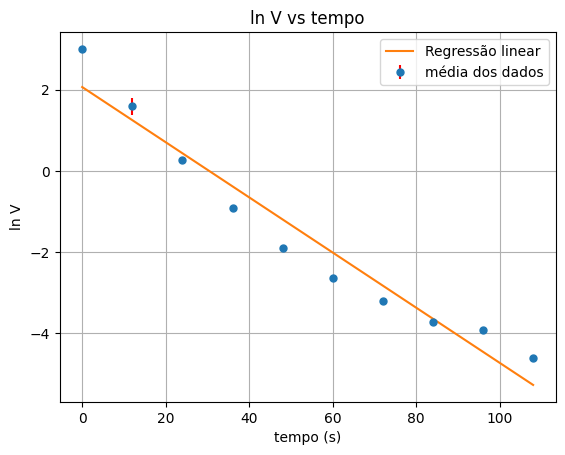

In [ ]:
mediaerr = np.array([0,0.2,.01,.01,.004,.004,0,.005,0,0])
plt.errorbar(tempo,logmedia,yerr=mediaerr,fmt='o',markersize=5,ecolor='red',label="média dos dados")
plt.plot(tempo,model.predict(tempo),label="Regressão linear")
plt.title("ln V vs tempo")
plt.ylabel("ln V")
plt.xlabel("tempo (s)")
plt.grid()
plt.legend()

In [ ]:
print(f'coeficiente angular: {model.coef_}')
print(f'coeficiente linear: {model.intercept_}')
print(f'coeficiente de determinação (R²): {r2_score(logmedia,model.predict(tempo))}')

coeficiente angular: [-0.06799026]
coeficiente linear: 2.065659224472435
coeficiente de determinação (R²): 0.9464760078765265
